In [1]:
from essentia.standard import *

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import csv

from scipy import interpolate

[   INFO   ] MusicExtractorSVM: no classifier models were configured by default


In [2]:
# we start by instantiating the audio loader:
loader = MonoLoader(filename='audios/par1_trim.mp3')

# and then we actually perform the loading:
audio = loader()

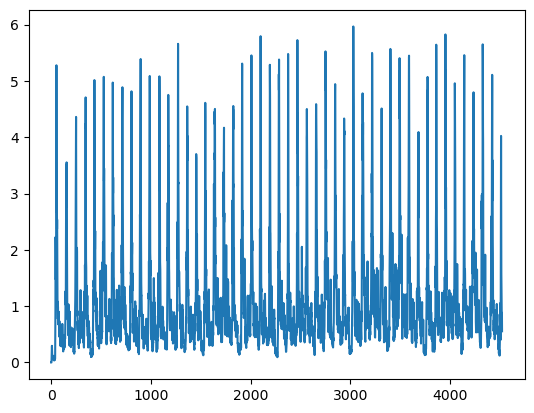

In [4]:
# O algoritmo OnsetDetection gera diversas ODFs,
# escolhemos a funcao Complex-Domain spectral difference 
od_complex = OnsetDetection(method='complex')

# Precisamos de algoritmos auxiliares para encontrar a magnitude e fase
w = Windowing(type='hann')
fft = FFT()
c2p = CartesianToPolar()

# Computa a ODF frame por frame e guarda o retorno em uma Pool.
pool = essentia.Pool()
for frame in FrameGenerator(np.array(audio), frameSize=1024, hopSize=512):
    magnitude, phase = c2p(fft(w(frame)))
    pool.add('odf.complex', od_complex(magnitude, phase))

onsets_complex = onsets(essentia.array([pool['odf.complex']]), [1])

plt.plot(pool['odf.complex'])